In [1]:
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline

In [17]:
data_lag_n = pd.read_csv("../../data/processed/pagos_por_unidad_lag_3.csv",
                  dtype = {
                                "unidad_id": "object",
                            },
                  parse_dates = ["expensa_mes_pago"])

In [3]:
data = pd.read_csv("../../data/processed/expensas_full_processed_vis.csv",
                  dtype = {
                                "expensa_id": "object",
                                "unidad_id": "object",
                                "consorcio_id": "object",
                                "expensa_mes":"object",
                            },
                  parse_dates = ["expensa_fecha", "expensa_mes_pago", "expensa_mes_pago_anterior"])

In [4]:
target_prop = data.target.mean()

In [5]:
base_plot = (ggplot(data, aes(fill='factor(target)'))
 + geom_hline(yintercept=target_prop) 
 + ylab("Proporcion de Impagos")
 + scale_fill_manual(["#5DADE2", "#EC7063"], name="Paga Tarde") 
 + theme(
     panel_background = element_rect(fill = "white"),
     panel_grid = element_line(color="grey", linetype="dashed", size=0.5)
 )
)

def get_xlab(varname):
    varname = varname.split("_")
    varname = varname[1:]
    varname = " ".join(varname)
    return varname.capitalize()

def get_title(varname):
    varname = varname.replace("_", " ")
    varname = varname.capitalize()
    varname += " vs Target"
    return varname

def plot_target_vs_var(varname, xlab_rot = 0):
    return (base_plot 
            + geom_bar(aes(x=varname),position = "fill")
            + geom_hline(yintercept=target_prop, linetype="dashed")
            + xlab(get_xlab(varname))
            + ggtitle(get_title(varname))
            + theme(axis_text_x = element_text(angle = xlab_rot, hjust = 1)))

def plot_cat_var(varname, xlab_rot = 0):
    return (base_plot 
            + geom_bar(aes(x=varname))
            + xlab(get_xlab(varname))
            + ylab("Cantidad de Impagos")
            + ggtitle(get_xlab(varname))
            + theme(axis_text_x = element_text(angle = xlab_rot, hjust = 1)))

In [13]:
data.loc[:,"subconjunto"] = "Prueba"
data.loc[ data.expensa_mes_pago < "2018-09-01","subconjunto"] = "Validacion"
data.loc[ data.expensa_mes_pago < "2018-06-01","subconjunto"] = "Entrenamiento"

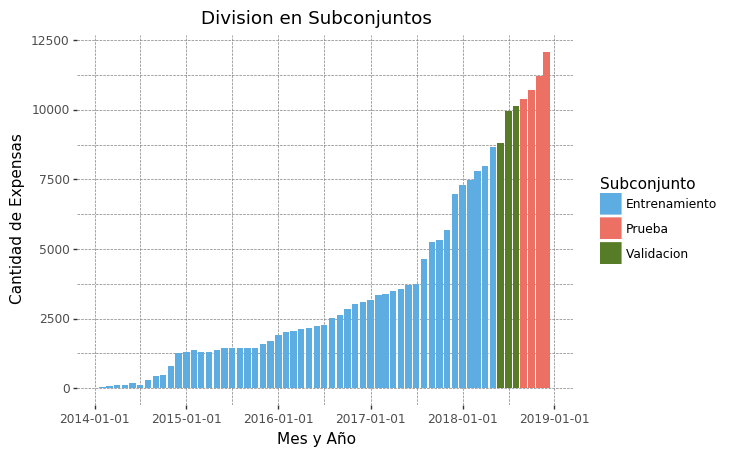

<ggplot: (133257648918)>

In [15]:
(ggplot(data, aes(fill="subconjunto"))
 + ylab("Cantidad de Expensas")
 + scale_fill_manual(["#5DADE2", "#EC7063", "#567c27"], name="Subconjunto") 
 + theme(
     panel_background = element_rect(fill = "white"),
     panel_grid = element_line(color="grey", linetype="dashed", size=0.5)
 )
 + geom_bar(aes(x="expensa_mes_pago"))
 + xlab("Mes y Año")
 + ggtitle("Division en Subconjuntos")
)


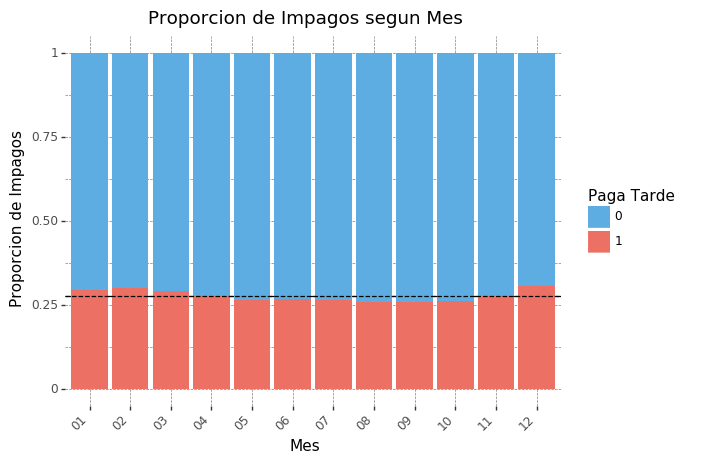

<ggplot: (96780192264)>

In [109]:
(plot_target_vs_var("expensa_mes_2", 45) 
 +  ggtitle("Proporcion de Impagos segun Mes")
 +  xlab("Mes"))

In [31]:
data["expensa_mes_2"] = data.expensa_mes_pago.dt.month

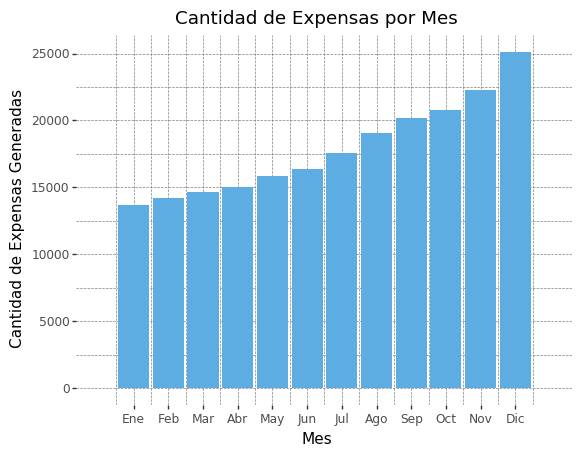

<ggplot: (-9223371939961679416)>

In [25]:
(ggplot(data)
 + ylab("Cantidad de Expensas Generadas")
 + theme(
     panel_background = element_rect(fill = "white"),
     panel_grid = element_line(color="grey", linetype="dashed", size=0.5)     
 )
 + geom_bar(aes(x="expensa_mes_2"), fill = "#5DADE2")
 + ggtitle("Cantidad de Expensas por Mes")
 + xlab("Mes")
 + scale_x_continuous(
     breaks=list(range(1,13)),
     labels=["Ene","Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"],
     limits = [0,13])
)

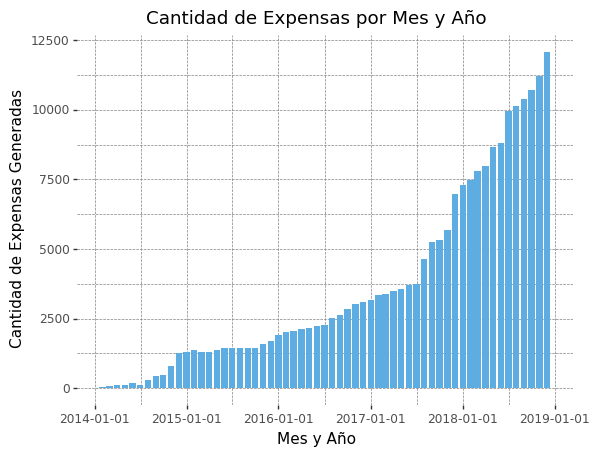

<ggplot: (-9223371939961051809)>

In [27]:
(ggplot(data)
 + ylab("Cantidad de Expensas Generadas")
 + theme(
     panel_background = element_rect(fill = "white"),
     panel_grid = element_line(color="grey", linetype="dashed", size=0.5)
 )
 + geom_bar(aes(x="expensa_mes_pago"), fill = "#5DADE2")
 + ggtitle("Cantidad de Expensas por Mes y Año")
 + xlab("Mes y Año")
)

In [47]:
group1 = data.groupby("expensa_mes_pago").mean().reset_index()[["expensa_mes_pago", "expensa_monto"]]

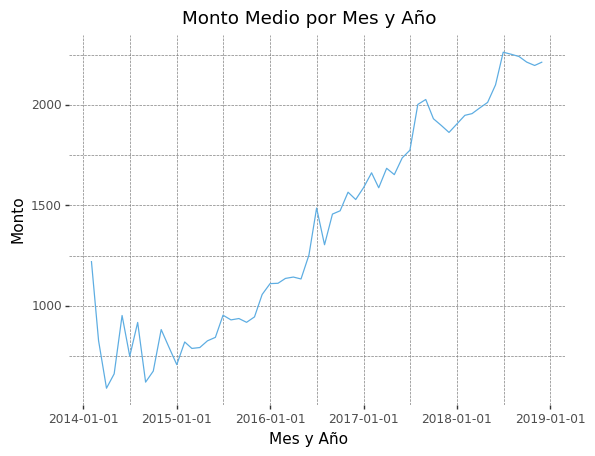

<ggplot: (-9223371940081654342)>

In [49]:
(ggplot(group1)
 + ylab("Monto")
 + theme(
     panel_background = element_rect(fill = "white"),
     panel_grid = element_line(color="grey", linetype="dashed", size=0.5)     
 )
 + geom_line(aes(x="expensa_mes_pago", y="expensa_monto"), color = "#5DADE2")
 + ggtitle("Monto Medio por Mes y Año")
 + xlab("Mes y Año")
)

In [84]:
data.loc[data.consorcio_nombre.str.contains("MONO")]

,expensa_id,consorcio_id,consorcio_nombre,consorcio_cantidad_expensas,consorcio_prop_impagos,consorcio_prop_efectivo,unidad_id,unidad_denominacion,unidad_tipo,expensa_proporcion,expensa_interes_primer_vencimiento,expensa_ineteres_segundo_vencimiento,expensa_mes,expensa_fecha,expensa_mes_pago,pago_metodo,target,expensa_mes_pago_anterior,expensa_monto,expensa_mes_2
96843,57758,1490,"CONSORCIO MONOBLOCK A""""",NaN,NaN,NaN,26976,P. B 1,Departamento,0.014197,5.0,5.0,06,2016-06-01,2016-06-01,Impago,1.0,2016-05-01,614.0,6
96844,57883,1490,"CONSORCIO MONOBLOCK A""""",NaN,NaN,NaN,26976,P. B 1,Departamento,0.014197,5.0,5.0,07,2016-07-01,2016-07-01,Impago,1.0,2016-06-01,614.0,7
96845,60777,1490,"CONSORCIO MONOBLOCK A""""",102.0,0.960784,0.000000,26976,P. B 1,Departamento,0.014201,5.0,5.0,08,2016-08-01,2016-08-01,Impago,1.0,2016-07-01,645.0,8
96846,67618,1490,"CONSORCIO MONOBLOCK A""""",51.0,0.137255,0.745098,26976,P. B 1,Departamento,0.014196,5.0,5.0,09,2016-09-01,2016-09-01,Impago,1.0,2016-08-01,677.0,9
96847,74905,1490,"CONSORCIO MONOBLOCK A""""",51.0,0.313725,0.607843,26976,P. B 1,Departamento,0.014199,5.0,5.0,10,2016-10-01,2016-10-01,Impago,1.0,2016-09-01,711.0,10
96848,77017,1490,"CONSORCIO MONOBLOCK A""""",51.0,0.313725,0.588235,26976,P. B 1,Departamento,0.014207,5.0,5.0,11,2016-11-01,2016-11-01,Impago,1.0,2016-10-01,747.0,11
96849,84172,1490,"CONSORCIO MONOBLOCK A""""",51.0,0.862745,0.000000,26976,P. B 1,Departamento,0.014207,5.0,5.0,12,2016-12-01,2016-12-01,Impago,1.0,2016-11-01,747.0,12
96850,88386,1490,"CONSORCIO MONOBLOCK A""""",51.0,0.235294,0.627451,26976,P. B 1,Departamento,0.014195,5.0,5.0,01,2017-01-01,2017-01-01,Impago,1.0,2016-12-01,821.0,1
96851,94630,1490,"CONSORCIO MONOBLOCK A""""",51.0,0.215686,0.627451,26976,P. B 1,Departamento,0.014194,5.0,5.0,02,2017-02-01,2017-02-01,Impago,1.0,2017-01-01,862.0,2
96852,97299,1490,"CONSORCIO MONOBLOCK A""""",51.0,0.294118,0.627451,26976,P. B 1,Departamento,0.014193,5.0,5.0,03,2017-03-01,2017-03-01,Impago,1.0,2017-02-01,905.0,3


In [85]:
data_plot = data.loc[data.consorcio_id=="1490",["unidad_id", "expensa_mes_pago", "pago_metodo"]]

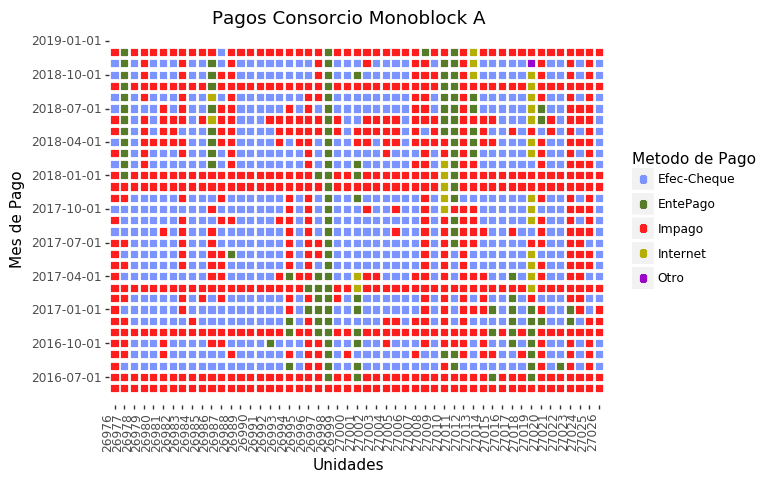

<ggplot: (-9223371940083062654)>

In [88]:
(ggplot(data_plot)
     #+ geom_rect(aes(xmin="x_min", xmax = "x_max",  ymin="y_min", ymax="y_max", fill = "color"), alpha=0.4, data = consorcios_rect)
     + geom_point(aes(x="unidad_id", y="expensa_mes_pago",color ="factor(pago_metodo)"), size=2, shape="s")
     + scale_color_manual(["#7c94ff","#567c27","#ff1e1e", "#b5af05", "#9b04c9"], name="Metodo de Pago") 
     #+ scale_color_manual(["#b5af05","#ff1e1e","#567c27"], name="Metodo de Pago") 
     + theme(
         panel_background = element_rect(fill = "white"),
         axis_text_x = element_text(angle = 90, hjust = 1)
     )
     + ggtitle("Pagos Consorcio Monoblock A")
     + xlab("Unidades")
     + ylab("Mes de Pago")
)

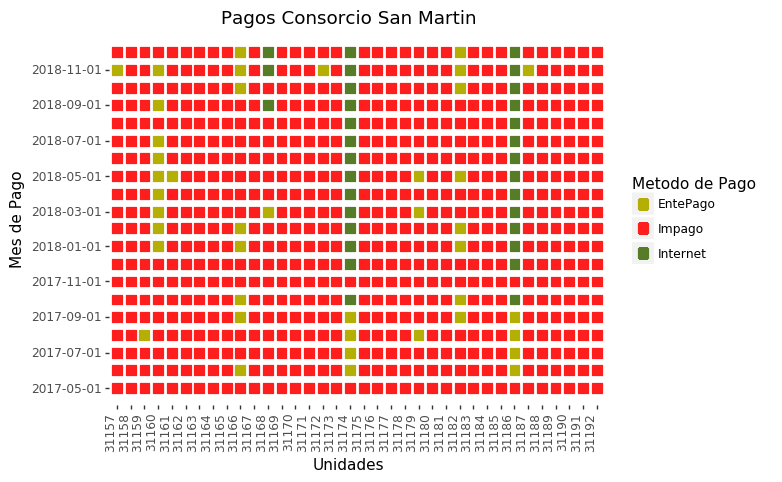

<ggplot: (-9223371940083516700)>

In [67]:
(ggplot(data_plot)
     #+ geom_rect(aes(xmin="x_min", xmax = "x_max",  ymin="y_min", ymax="y_max", fill = "color"), alpha=0.4, data = consorcios_rect)
     + geom_point(aes(x="unidad_id", y="expensa_mes_pago",color ="factor(pago_metodo)"), size=3.5, shape="s")
     #+ scale_color_manual(["#7c94ff","#567c27","#ff1e1e", "#b5af05", "#9b04c9"], name="Metodo de Pago") 
     + scale_color_manual(["#b5af05","#ff1e1e","#567c27"], name="Metodo de Pago") 
     + theme(
         panel_background = element_rect(fill = "white"),
         axis_text_x = element_text(angle = 90, hjust = 1)
     )
     + ggtitle("Pagos Consorcio San Martin")
     + xlab("Unidades")
     + ylab("Mes de Pago")
)

In [8]:
final_data = pd.merge(
    data[["expensa_id", "unidad_id", "unidad_tipo", "expensa_mes", "expensa_mes_pago"]],
    data_lag_n,
    left_on = ["unidad_id", "expensa_mes_pago"],
    right_on = ["unidad_id", "expensa_mes_pago"],
    how = "inner"
)

In [9]:
final_data.shape

(168955, 12)

In [27]:
final_data["target_lag_1"] = final_data.pago_metodo_lag_1 == "Impago"

In [10]:
data_lag_n.shape

(168955, 9)

In [12]:
final_data.columns

Index(['expensa_id', 'unidad_id', 'unidad_tipo', 'expensa_mes',
       'expensa_mes_pago', 'pago_metodo_lag_6', 'pago_metodo_lag_5',
       'pago_metodo_lag_4', 'pago_metodo_lag_3', 'pago_metodo_lag_2',
       'pago_metodo_lag_1', 'target'],
      dtype='object')

In [14]:
model_columns = ['unidad_tipo', 'expensa_mes', 'pago_metodo_lag_6', 'pago_metodo_lag_5',
       'pago_metodo_lag_4', 'pago_metodo_lag_3', 'pago_metodo_lag_2',
       'pago_metodo_lag_1'] 

final_data = final_data.sort_values("expensa_mes_pago")
min_cv_id = final_data.loc[final_data.expensa_mes_pago == "2018-06-01", "expensa_mes_pago"].idxmin()
min_test_id = final_data.loc[final_data.expensa_mes_pago == "2018-09-01", "expensa_mes_pago"].idxmin()

In [19]:
def get_train_test_split(X_columns):
    X_train = pd.get_dummies(final_data.loc[0:min_test_id, X_columns])
    X_test = pd.get_dummies(final_data.loc[min_test_id:, X_columns])
    Y_train = final_data.loc[0:min_test_id, "target"]
    Y_test = final_data.loc[min_test_id:, "target"]
    
    drop_test_columns = [column for column in X_test.columns if column not in X_train.columns]
    X_test = X_test.drop(columns=drop_test_columns)

    for column in [column for column in X_train.columns if column not in X_test.columns]:
        X_test[column] = 0
    
    X_test = X_test[X_train.columns]
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    return X_train, Y_train, X_test, Y_test

In [20]:
X_train, Y_train, X_test, Y_test = get_train_test_split(model_columns)

(131848, 51) (131848,)
(37108, 51) (37108,)


In [21]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(
    C = 1000000,
    solver = "lbfgs",
    penalty = "l2",
    max_iter = 100,
)
logReg.fit(X_train, Y_train) 

LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [28]:
X_train, Y_train, X_test, Y_test = get_train_test_split(["target_lag_1"])
logReg = LogisticRegression(
    C = 1000000,
    solver = "lbfgs",
    penalty = "l2",
    max_iter = 100,
)
logReg.fit(X_train, Y_train) 
get_train_test_meassures(logReg, X_train, Y_train, X_test, Y_test)

(131848, 1) (131848,)
(37108, 1) (37108,)
accuracy: 0.8660578848370851
precision: 0.7510658324566746
recall: 0.7578635677970836
f1: 0.7544493882091211
--------------------------------------------------
accuracy: 0.8635604182386547
precision: 0.7054009819967266
recall: 0.7035093855660487
f1: 0.7044539139571536


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def get_train_test_meassures(model, X_train, Y_train, X_test, Y_test):
    train_preds = model.predict(X_train)
    print("accuracy:", accuracy_score(Y_train, train_preds))
    print("precision:", precision_score(Y_train, train_preds))
    print("recall:", recall_score(Y_train, train_preds))
    print("f1:", f1_score(Y_train, train_preds))
    print("--------------------------------------------------")
    test_preds = model.predict(X_test)
    print("accuracy:", accuracy_score(Y_test, test_preds))
    print("precision:", precision_score(Y_test, test_preds))
    print("recall:", recall_score(Y_test, test_preds))
    print("f1:", f1_score(Y_test, test_preds))

In [23]:
get_train_test_meassures(logReg, X_train, Y_train, X_test, Y_test)

accuracy: 0.8805518475820642
precision: 0.8163400549086434
recall: 0.7226381362087267
f1: 0.7666365374072043
--------------------------------------------------
accuracy: 0.8821547914196399
precision: 0.7841308461746418
recall: 0.6763437099218841
f1: 0.7262597809076683


In [ ]:
def get_logReg_coef(model, columns):
    lm_coef = pd.DataFrame({
        "variable": columns,
        "coef": model.coef_[0]
    })

    lm_coef["abs_coef"] = abs(lm_coef.coef)

    from pandas.api.types import CategoricalDtype
    lm_coef = lm_coef.sort_values("abs_coef", ascending = False)
    lm_coef = lm_coef.reset_index().drop(columns="index")

    variable_cat = CategoricalDtype(categories=lm_coef.variable, ordered=True)
    lm_coef.variable = lm_coef.variable.astype(variable_cat)

    figure_size = (16, 4.8)
    return (ggplot(data=lm_coef)
    + geom_bar(aes(x = "variable",y="coef"), stat = "identity")
    + theme( axis_text_x = element_text(angle = 45, hjust = 1),
              figure_size = (16, 4.5))
    )